In [49]:
# from google.colab import drive
# drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [50]:
from matplotlib import pyplot
from matplotlib.image import imread
import numpy as np
from PIL import Image
import operator
from operator import itemgetter
import os
from sklearn.neural_network import MLPClassifier

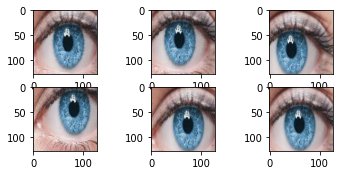

In [51]:
# folder = '/content/drive/My Drive/Colab Notebooks/ia/treino_olhos/normal/'
folder = './treino_olhos/normal/'

for i in range(6):
    pyplot.subplot(330 + 1 + i)
    filename = 'image'+str(i)+'.jpg'
    image = imread(folder+"/"+filename)
    pyplot.imshow(image)
pyplot.show()

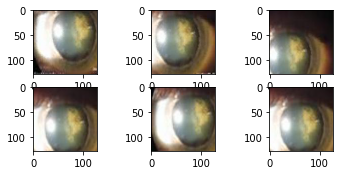

In [52]:
# folder = '/content/drive/My Drive/Colab Notebooks/ia/treino_olhos/cataract/'
folder = './treino_olhos/cataract/'

for i in range(6):
    pyplot.subplot(330 + 1 + i)
    filename = 'image'+str(i)+'.jpg'
    image = imread(folder+"/"+filename)
    pyplot.imshow(image)
pyplot.show()

In [53]:
x = []
y = []

count = 0
# dir = '/content/drive/My Drive/Colab Notebooks/ia/treino_olhos/'
dir = './treino_olhos/'

for i in os.listdir(dir):
  path = dir+'/'+i
  print(i, ':', len(os.listdir(path)))
  count += len(os.listdir(path))
  for j in os.listdir(path):
    img = Image.open(path + '/' + j)
    img = img.resize((128, 128))
    x.append(np.asarray(img))
    y.append(i)

print(count)
x = np.asarray(x)
y = np.asarray(y)
print(x.shape, y.shape)

cataract : 1101
normal : 1178
2279
(2279, 128, 128, 3) (2279,)


In [54]:
x = x.reshape(x.shape[0], 49152).astype('float32')
x /= 255
x.shape

(2279, 49152)

In [ ]:
mlp = MLPClassifier(hidden_layer_sizes=(100,100,100),max_iter=500)
mlp.fit(x,y)

In [ ]:
# img = Image.open('/content/drive/My Drive/Colab Notebooks/ia/teste/normal/image75.jpg')
img = Image.open('./teste/normal/image75.jpg')
img = img.resize((128, 128))
img

In [ ]:
new_img = np.asarray(img)
new_img = new_img.reshape(1, 49152).astype('float32')
new_img

new_img /= 255
new_img.shape
new_img

prediction = mlp.predict(new_img)
print(prediction)

In [ ]:
mlp.score(x, y)

In [ ]:
# img = Image.open('/content/drive/My Drive/Colab Notebooks/ia/teste/cataract/image0.jpg')
img = Image.open('./teste/cataract/image0.jpg')
img = img.resize((128, 128))
img

In [ ]:
new_img = np.asarray(img)
new_img = new_img.reshape(1, 49152).astype('float32')
new_img

new_img /= 255
new_img.shape
new_img

prediction = mlp.predict(new_img)
print(prediction)

In [ ]:
import pickle
pickle.dump(mlp,open('new_model.pkl','wb')) #saving our model in .pkl file

Aplicação web

In [ ]:
!pip install streamlit

In [ ]:
!pip install pyngrok

In [ ]:
%%writefile app.py
import streamlit as st
from PIL import Image
import numpy as np

import pickle
#loading our model
model = pickle.load(open('new_model.pkl','rb'))

PAGE_CONFIG = {"page_title":"StColab.io","page_icon":":smiley:","layout":"centered"}
st.set_page_config(**PAGE_CONFIG)


def main():
  st.title("Sistema para identificar casos de Catarata por meio de imagens")
  st.subheader("Por favor, insira a foto de um olho para diagnostico:")
  uploaded_file = st.file_uploader("Selecionar imagem")
  
  if(uploaded_file != None):
    st.image(uploaded_file, caption='Imagem enviada')
    img = Image.open(uploaded_file)
    img = img.resize((128, 128))
    new_img = np.asarray(img)
    new_img = new_img.reshape(1, 49152).astype('float32')
    new_img /= 255
    #new_img.shape

    prediction = model.predict(new_img)
    st.write(prediction)



if __name__ == '__main__':
  main()

In [ ]:
# !ngrok authtoken 1vrm9JHZZwp8cGvFksYGAFrZYqJ_6YFTSHmdwYAvA6m9CrT2d # Token Yasser

In [ ]:
!ngrok authtoken 1vtlQcqwEjpGfuMGMeSMXAnXzsj_4qQMmbJVcQJTuLHzrUvWt # Token Thiago

In [ ]:
!ngrok

In [ ]:
from pyngrok import ngrok

In [ ]:
!streamlit run app.py &>/dev/null&

In [ ]:
!pgrep streamlit

In [ ]:
publ_url = ngrok.connect('8501')

In [ ]:
publ_url